# Greedy algorithm for interval partitioning
## Problem Description:
### Given a set of activities (or tasks) with start and finish times asign each of them to a resource in such a way that overlapping intervals get assiged to different resources. The goal is to use the least possible number of resources. This is a particular case of the graph coloring problem, which admits an efficient solution. One simply orders the intervals by ascending starting time and runs greedy coloring. The special features of the graph make it so that the number of colors is optimal.


In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import networkx as nx
from itertools import combinations
import matplotlib.patches as patches


## Choose a list of colors

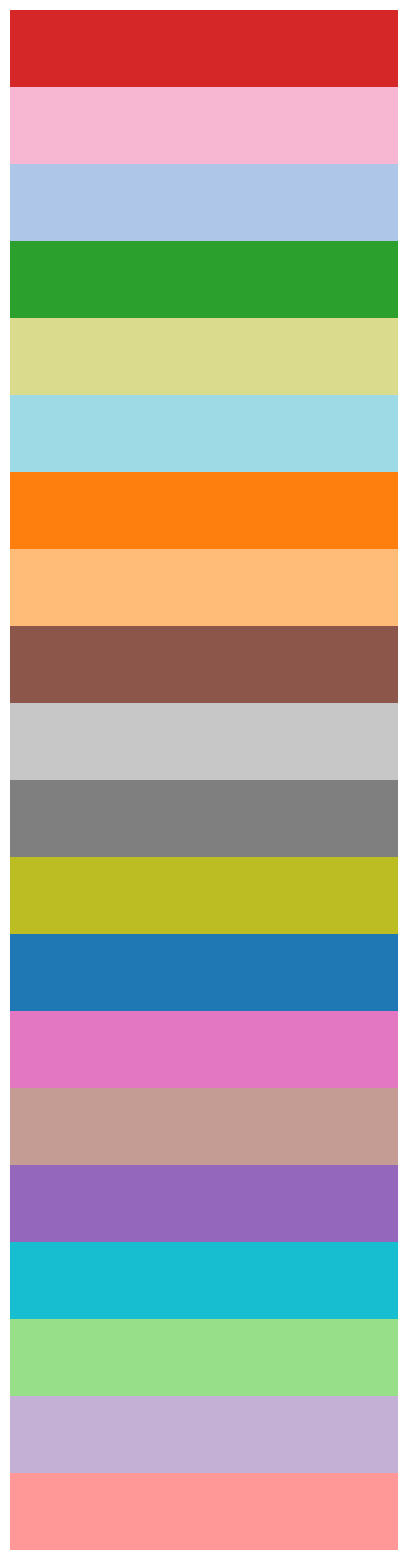

In [17]:
cmap = plt.cm.tab20
colors = [cmap(i) for i in range(20)]
random.shuffle(colors)
          
def display_colors(color_list):
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(5, len(color_list)))

    # Display each color as a rectangle
    for idx, color in enumerate(color_list):
        rect = patches.Rectangle((0, idx), 5, 1, linewidth=1, edgecolor='none', facecolor=color)
        ax.add_patch(rect)

    # Adjust the view
    ax.set_xlim(0, 3)
    ax.set_ylim(0, len(color_list))
    ax.axis('off')  # Hide the axis
    plt.show()
display_colors(colors)


## Generate an instance

In [21]:
def generate_intervals(number_of_intervals=20,min_start=0,max_start=100,max_length=20):
    ans=[]
    for i in range(number_of_intervals):
        line=dict()
        line["index"]=i
        line["start"]=np.random.choice(range(min_start,max_start))
        line["end"]=line["start"]+np.random.choice(range(1,max_length))
        ans.append(line)
    ans=sorted(ans,key=lambda x: x['end'])
    for line in ans:
        line["index"]=ans.index(line)
    return ans

## Check collision

In [2]:
def check_collision(x,y):
    ans=True
    if x["start"]>=y["end"] or y["start"]>=x["end"]:
        ans= False
    return ans

### Plot an instance of the problem

In [3]:
def plot_instance(instance):
    fig, ax = plt.subplots()
    lines_data = instance
    

    # Plot each horizontal line
    for line in lines_data:
        l,=ax.plot([line["start"], line["end"]], [line["index"], line["index"]], color='black')
        l.set_linewidth(3)

    # Display the plot
    return plt.show()

In [19]:
instancia=[{'index': 0, 'start': 3, 'end': 7},
 {'index': 1, 'start': 17, 'end': 21},
 {'index': 2, 'start': 15, 'end': 22},
 {'index': 3, 'start': 2, 'end': 6},
 {'index': 4, 'start': 13, 'end': 15},
 {'index': 5, 'start': 6, 'end': 9},
 {'index': 6, 'start': 12, 'end': 20},
 {'index': 7, 'start': 17, 'end': 19},
 {'index': 8, 'start': 3, 'end': 7},
 {'index': 9, 'start': 19, 'end': 24}]

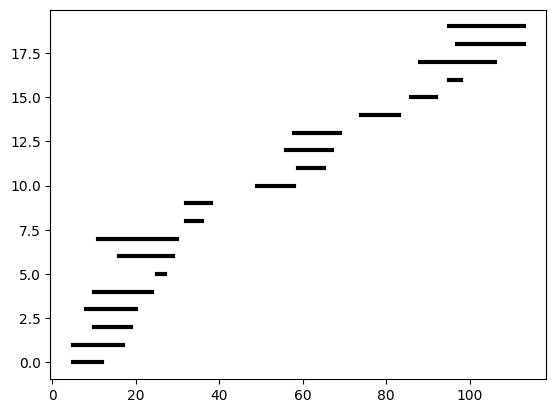

In [34]:
instancia=generate_intervals()
#exam_requests = [(5, 6), (18, 23), (15, 20), (2, 5), (18, 19), (4, 9), (4, 7), (16, 18), (2, 4), (2, 5)]
#er=[{"index":index,"start":item[0],"end":item[1]} for index,item in enumerate(exam_requests)]
plot_instance(instancia)

### Make graph from intervals with vertices ordered by starting time

In [6]:
def make_graph_from_instance(instance):

    vertices=sorted(instance, key=lambda x: x['start'])
    vertices=[element["index"] for element in vertices]
    adjacency_dict=dict()
    for vertex in vertices:
        adjacency_dict[vertex]=[]
    for a,b in list(combinations(instance,2)):
        if check_collision(a,b):
            adjacency_dict[a["index"]].append(b["index"])
            adjacency_dict[b["index"]].append(a["index"]) 
    G = nx.Graph(adjacency_dict)
    return G


In [21]:
G=make_graph_from_instance(instancia)

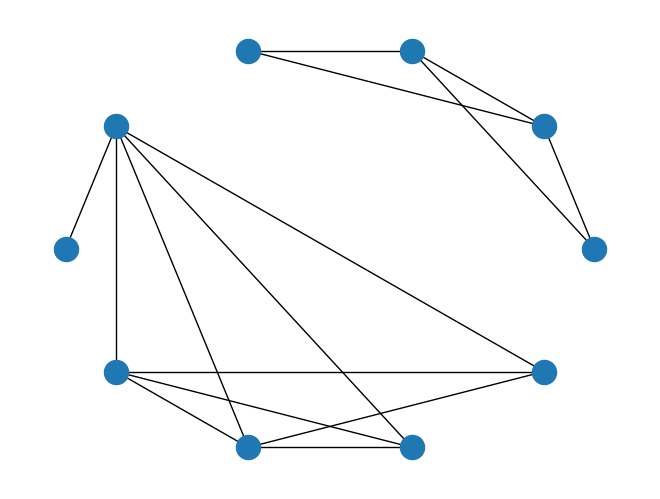

In [22]:
nx.draw(G,pos=nx.circular_layout(G))

### Graph Coloring function

In [11]:
def greedy_color_graph(Graph,random_order=False,position_function=nx.circular_layout,with_labels=False):
    vertices = list(Graph.nodes())
    if random_order:
        np.random.shuffle(vertices)

    N=len(vertices)
    coloring_rule=dict()
    for node in vertices:
        coloring_rule[node]="black"
    frames=[coloring_rule.copy()]
    for node in vertices:
        forbiden=[coloring_rule[item] for item in G.neighbors(node)]
        for color in colors:
            if color not in forbiden:
                coloring_rule[node]=color
                frames.append(coloring_rule.copy())
                break
            
        #print(forbiden)
    coloring_list=[coloring_rule[node] for node in Graph.nodes()]

    fig, ax = plt.subplots()
    nx.draw(G,pos=position_function(G),node_color=coloring_list,node_size=100)
    #plt.show()
    plt.close(fig)
    ans=dict()
    ans["coloring_rule"]=coloring_rule
    ans["number of colors"]=len(set(list(coloring_rule.values())))
    ans["frames"]=frames
    ans["image"]=fig
    return ans

### Animate the Greedy coloring of the graph

In [12]:
def animate_greedy_coloring(G,random_order=False,position_function=nx.circular_layout,with_labels=False):
    answer=greedy_color_graph(G,random_order=random_order,position_function=position_function,with_labels=with_labels)
    frames=answer["frames"]
    number_of_colors=answer["number of colors"]
    pos = nx.circular_layout(G)  # positions for all nodes. There are other possibilities fo layout...
    fig, ax = plt.subplots()
    def update(frame):
        ax.clear()
        node_colors=[frame[node] for node in G.nodes()]
        nx.draw_networkx_edges(G, pos=position_function(G), ax=ax)
        nx.draw_networkx_nodes(G, pos=position_function(G), nodelist=G.nodes, node_color=node_colors, ax=ax)
        if with_labels:
            nx.draw_networkx_labels(G, pos, ax=ax)

    ani = FuncAnimation(fig, update, frames=frames, repeat=True)

    # Convert the animation to a JSHTML representation
    ani_jshtml = ani.to_jshtml()
    print(f"The number of colors used in this coloring is {number_of_colors}")
    # Display the animation
    return(HTML(ani_jshtml))

## Animate interval coloring

In [13]:
def animate_interval_coloring(instance):
    # Set up the figure, the axis, and the plot element
    fig, ax = plt.subplots()
    # ax.set_xticks(range(0,max(item["end"] for item in instance)+2))
    # ax.grid(True)
    lines_data = sorted(instance,key=lambda x: x['start'])
    N=len(instance)
        
    horlines=[]
    # Plot each horizontal line
    for line in lines_data:
            horline,=ax.plot([line["start"], line["end"]], [line["index"], line["index"]], color='black')
            horline.set_linewidth(2)
            horlines.append(horline)
    # for horline in horlines:
    #     horline.set_color("blue")
    answer=greedy_color_graph(make_graph_from_instance(instance))
    frames=answer["frames"]
    number=answer["number of colors"]

    def init():
        #ax.set_xlim(0, 10)
        #ax.set_ylim(0, len(instance))
        return *horlines,

    def update(frame):
        for i in range(len(horlines)):
            horlines[i].set_color(frame[lines_data[i]["index"]])

        return horlines

    ani = FuncAnimation(fig, update, frames=frames,init_func=init,blit=True)
    print(f"The number of colors used in this coloring is {number}")
    return HTML(ani.to_jshtml())
#plt.show()






In [23]:
#intervals=generate_intervals()
G=make_graph_from_instance(instancia)

The number of colors used in this coloring is 4


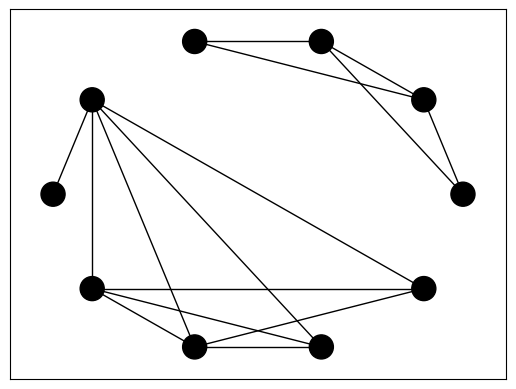

In [24]:
animate_greedy_coloring(G,with_labels=True)

The number of colors used in this coloring is 3


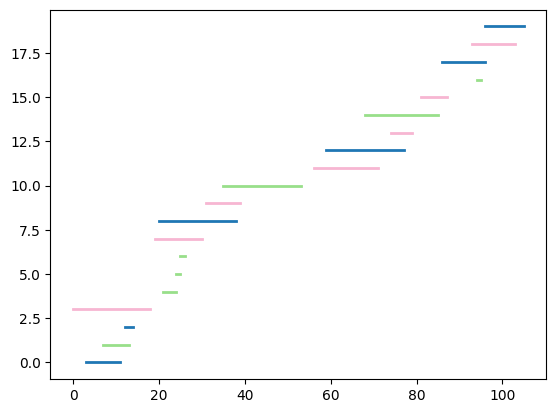

In [431]:
animate_interval_coloring(intervals)

## Nicolas' idea
### Run interval scheduling iteratively. In the first pass find the maximum number of compatible requests and assign them to one of the resources. Delete those requests and repeat. This is a very good idea, but it does not always result in an optimal solution.

## This function chooses the first interval to finish

In [432]:
def choose_interval(intervals):
    finish_time=min([interval["end"] for interval in intervals])
    for interval in intervals:
        if interval["end"]==finish_time:
            return interval



## This is the algorithm for interval scheduling

In [433]:
def interval_scheduling(intervals):
    requests=intervals.copy()
    accepted=[]
    while requests:
        chosen=choose_interval(requests)
        accepted.append(chosen)
        requests=[request for request in requests if check_collision(chosen,request)==False]
        #print(requests)
        #print(chosen)
    return accepted

## This is the algorithm suggested by Nicolás

In [434]:
def Nicolas(instance):
    remaining=instance.copy()
    rooms=0
    groups=[]
    while remaining:
        groups.append(interval_scheduling(remaining))
        remaining=[item for item in remaining if item not in interval_scheduling(remaining)]
        rooms=rooms +1
    ans=dict()
    ans["number of rooms"]=rooms
    ans["groups"]=groups
    return ans
        

## This is another way to draw the result

In [435]:
def plot_sequence_Nicolas(instance):
    sequence=Nicolas(instance)["groups"]
    # This function takes a list of lists of dictionaries and paints the
    # intervals in each list with a different color
    fig, ax = plt.subplots()
    # Plot each horizontal line
    N=len(sequence)
    for i in range(N):
        for line in sequence[i]:
            l,=ax.plot([line["start"], line["end"]], [line["index"], line["index"]], color=colors[i])
            l.set_linewidth(3)
    # Display the plot
    number=len(sequence)
    print(f"The number of colors used in this intance is {number} ")
    return plt.show()


## Let us check an example

In [436]:
ejemplo=generate_intervals(number_of_intervals=101)
G=make_graph_from_instance(ejemplo)

The number of colors used in this intance is 19 


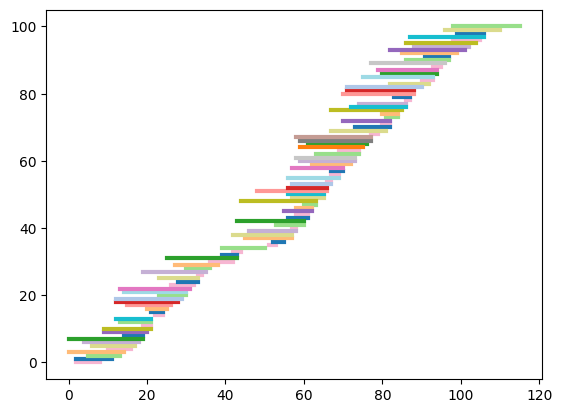

In [437]:
plot_sequence_Nicolas(ejemplo)

## Compare with the optmal solution

The number of colors used in this coloring is 19


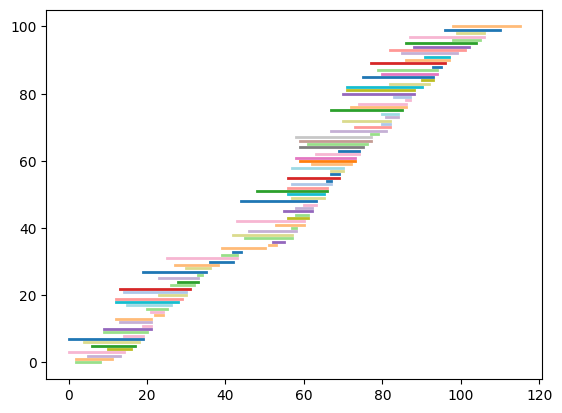

In [438]:
animate_interval_coloring(ejemplo)

The number of colors used in this coloring is 12


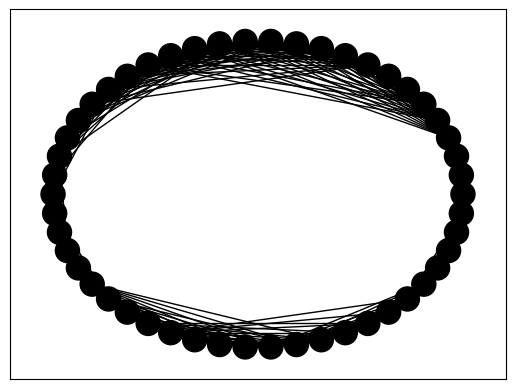

In [335]:
animate_greedy_coloring(G)